In [40]:
from dataset import HW3Dataset
from torch.nn import Linear, ReLU
from torch_geometric.nn import Sequential, GCNConv
from torch_geometric.utils import to_networkx
import torch
import networkx as nx
from matplotlib import pyplot as plt

In [101]:
dataset = HW3Dataset(root='data/hw3/')
data = dataset[0]

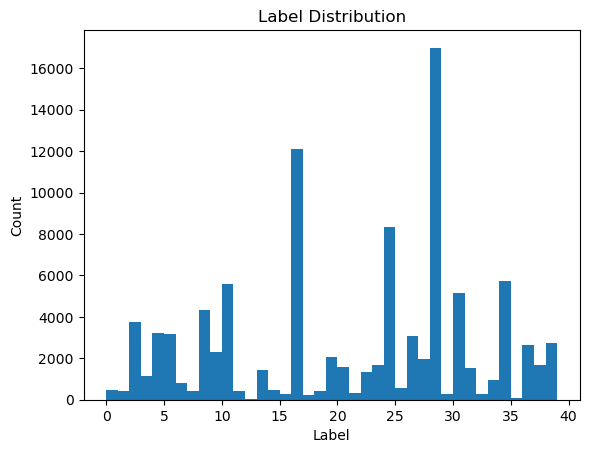

In [112]:
plt.hist(data.y.view(-1), bins=range(40))
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.savefig('label_distribution.png', dpi=1200)
plt.show()

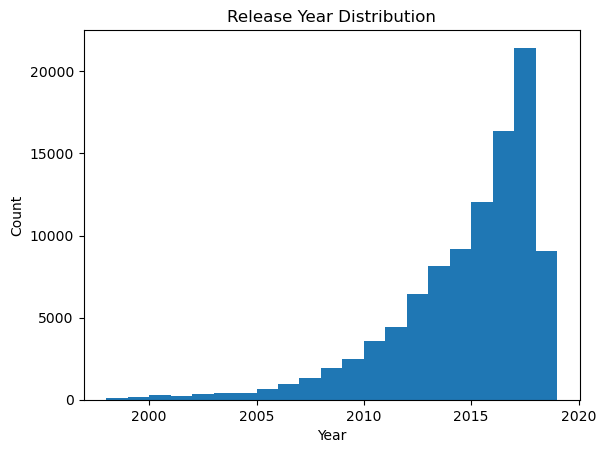

In [85]:
plt.hist(data.node_year.view(-1), bins=range(1998, 2020))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Release Year Distribution')
plt.show()

KeyboardInterrupt: 

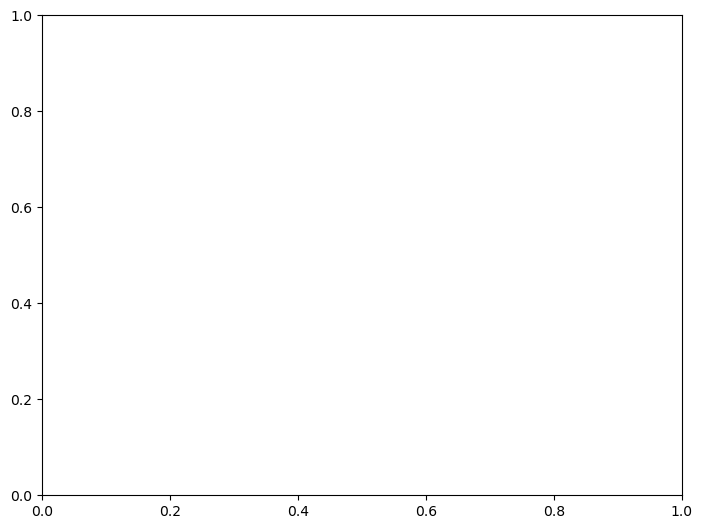

In [41]:
nx.draw(to_networkx(data), with_labels=True)

In [9]:
min(data['y'])

tensor([0])

torch.Size([100000, 130])

In [109]:
model = Sequential('x, edge_index', [
    (GCNConv(128, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    Linear(64, 40),
])

In [73]:
model = Sequential('x, edge_index', [
    (GCNConv(128, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    torch.nn.Dropout(0.01),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    torch.nn.Dropout(0.01),
    Linear(64, 40),
])

In [103]:
model = Sequential('x, edge_index', [
    (GCNConv(128, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    Linear(64, 40),
])

In [71]:
model(data.x, data.edge_index).shape

torch.Size([100000, 40])

In [110]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
prev_loss = 0
cur_loss = 0
train_losses = []
test_losses = []
train_accs = []
test_accs = []
max_acc = 0.59
epoch = 0
while prev_loss - cur_loss > 0.0001 or epoch < 2:
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask].view(-1))
    test_loss = criterion(out[data.val_mask], data.y[data.val_mask].view(-1)).item()
    train_acc = torch.sum(torch.argmax(out[data.train_mask], dim=1) == data.y[data.train_mask].view(-1)) / len(data.y[data.train_mask])
    test_acc = torch.sum(torch.argmax(out[data.val_mask], dim=1) == data.y[data.val_mask].view(-1)) / len(data.y[data.val_mask])
    if test_acc > max_acc:
        max_acc = test_acc
        print(f'Max accuracy: {max_acc}')
        torch.save(model.state_dict(), 'model.pt')
    prev_loss = cur_loss
    cur_loss = loss.item()
    train_losses.append(cur_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    if epoch % 10 == 0: print(f'Epoch {epoch}: {cur_loss}')
    epoch += 1
    loss.backward()
    optimizer.step()


Epoch 0: 3.686013698577881
Epoch 10: 3.423624277114868
Epoch 20: 3.1711130142211914
Epoch 30: 3.030726909637451
Epoch 40: 2.9127919673919678
Epoch 50: 2.78594970703125
Epoch 60: 2.647257089614868
Epoch 70: 2.5012764930725098
Epoch 80: 2.3586161136627197
Epoch 90: 2.2352852821350098
Epoch 100: 2.1337175369262695
Epoch 110: 2.0493106842041016
Epoch 120: 1.975649356842041
Epoch 130: 1.9098998308181763
Epoch 140: 1.8535256385803223
Epoch 150: 1.806289792060852
Epoch 160: 1.7667162418365479
Epoch 170: 1.7325987815856934
Epoch 180: 1.7024589776992798
Epoch 190: 1.6758376359939575
Epoch 200: 1.6523158550262451
Epoch 210: 1.6314435005187988
Epoch 220: 1.6128488779067993
Epoch 230: 1.5961641073226929
Epoch 240: 1.5810742378234863
Epoch 250: 1.567312240600586
Epoch 260: 1.554626703262329
Epoch 270: 1.5428656339645386
Epoch 280: 1.531861662864685
Epoch 290: 1.5215154886245728
Epoch 300: 1.5118800401687622
Epoch 310: 1.5029107332229614
Epoch 320: 1.4945605993270874
Epoch 330: 1.4867393970489502
Ep

In [111]:
test_accs[-1]

tensor(0.5750)

In [74]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
prev_loss = 0
cur_loss = 0
train_losses = []
test_losses = []
train_accs = []
test_accs = []
max_acc = 0
epoch = 0
while prev_loss - cur_loss > 0.0001 or epoch < 2:
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask].view(-1))
    test_loss = criterion(out[data.val_mask], data.y[data.val_mask].view(-1)).item()
    train_acc = torch.sum(torch.argmax(out[data.train_mask], dim=1) == data.y[data.train_mask].view(-1)) / len(data.y[data.train_mask])
    test_acc = torch.sum(torch.argmax(out[data.val_mask], dim=1) == data.y[data.val_mask].view(-1)) / len(data.y[data.val_mask])
    if test_acc > max_acc:
        max_acc = test_acc
        print(f'Max accuracy: {max_acc}')
        torch.save(model.state_dict(), 'model2.pt')
    prev_loss = cur_loss
    cur_loss = loss.item()
    train_losses.append(cur_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    if epoch % 10 == 0: print(f'Epoch {epoch}: {cur_loss}')
    epoch += 1
    loss.backward()
    optimizer.step()


Max accuracy: 0.03804999962449074
Epoch 0: 3.672182321548462
Max accuracy: 0.07164999842643738
Max accuracy: 0.1043500006198883
Max accuracy: 0.12610000371932983
Max accuracy: 0.1343500018119812
Max accuracy: 0.13580000400543213
Epoch 10: 3.4028496742248535
Max accuracy: 0.1378999948501587
Epoch 20: 3.153103828430176
Max accuracy: 0.14274999499320984
Max accuracy: 0.15070000290870667
Max accuracy: 0.1692499965429306
Max accuracy: 0.19789999723434448
Max accuracy: 0.22769999504089355
Max accuracy: 0.25014999508857727
Max accuracy: 0.26260000467300415
Max accuracy: 0.26785001158714294
Max accuracy: 0.2689000070095062
Epoch 30: 3.022963523864746
Epoch 40: 2.913559675216675
Max accuracy: 0.2691499888896942
Max accuracy: 0.27595001459121704
Max accuracy: 0.28125
Max accuracy: 0.28334999084472656
Max accuracy: 0.2859500050544739
Max accuracy: 0.2893500030040741
Max accuracy: 0.2916499972343445
Max accuracy: 0.2939999997615814
Max accuracy: 0.29794999957084656
Epoch 50: 2.792306661605835
Max 

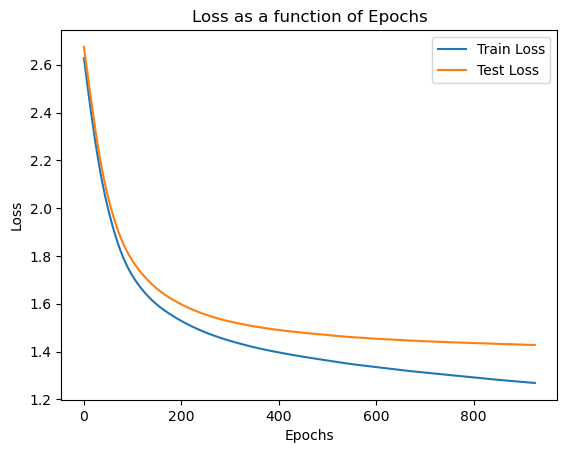

In [31]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss as a function of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

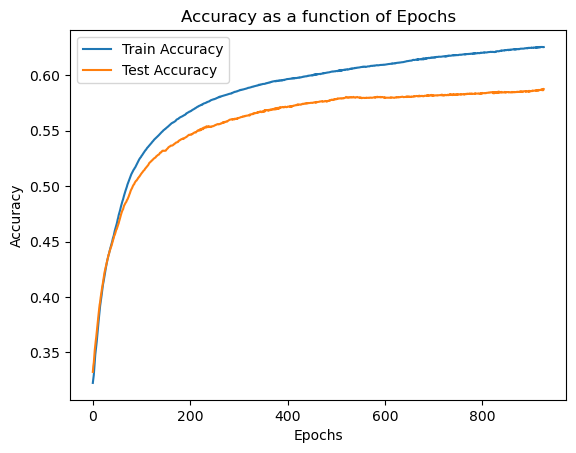

In [32]:
plt.plot(train_accs, label='Train Accuracy')
plt.plot(test_accs, label='Test Accuracy')
plt.legend()
plt.title('Accuracy as a function of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [44]:
from torch_geometric.nn import Sequential, GCNConv
from torch.nn import Linear, ReLU
from dataset import HW3Dataset
import torch
import pandas as pd
MODEL_PATH = 'model.pt'



def main():
    model = Sequential('x, edge_index', [
    (GCNConv(128, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    (GCNConv(64, 64), 'x, edge_index -> x'),
    ReLU(inplace=True),
    Linear(64, 40),])
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()
    data = HW3Dataset(root='data/hw3/')[0]
    pred = torch.argmax(model(data.x, data.edge_index), dim=1)
    pd.DataFrame({'idx': range(0, len(pred)), 'prediction': pred}).to_csv('prediction.csv', index=False)

if __name__ == '__main__':
    main()

In [45]:
main()

In [53]:
sum(pd.read_csv('prediction.csv')['prediction'] == list(data.y.view(-1))) / len(data.y.view(-1))

0.61792

In [50]:
pd.read_csv('prediction.csv')['prediction']

0         4
1         9
2        28
3         2
4        27
         ..
99995    26
99996     8
99997    15
99998    30
99999    34
Name: prediction, Length: 100000, dtype: int64

In [56]:
data.node_year

tensor([[2013],
        [2015],
        [2014],
        ...,
        [2018],
        [2018],
        [2018]])